In [12]:
import numpy as np
import healpy as hp
import pickle
import analysis as ana
import basic
import curvedsky
import prjlib
from matplotlib.pyplot import *

In [13]:
ps, fs = prjlib.filename_init(doreal='False',dodust='False')
pd, fd = prjlib.filename_init(doreal='False',dodust='True')

In [14]:
bn = 50
mb  = prjlib.multipole_binning(bn,spc='',lmin=200,lmax=2048)
sEE = prjlib.binned_cl_rlz(fs.cli,0,200,mb,cn=2)
sBB = prjlib.binned_cl_rlz(fs.cli,0,200,mb,cn=3)
mEE = np.mean(sEE,axis=0)
mBB = np.mean(sBB,axis=0)
vBB = np.std(sBB,axis=0)
oEE = prjlib.binned_cl(fs.ocl,mb,cn=2)
oBB = prjlib.binned_cl(fs.ocl,mb,cn=3)

In [25]:
#sElm = pickle.load(open(fs.alm['E'][0],"rb"))
sBlm = pickle.load(open(fs.alm['B'][0],"rb"))
#tElm = pickle.load(open(fd.alm['E'][0],"rb"))
tBlm = pickle.load(open(fd.alm['B'][0],"rb"))
#dElm = tElm - sElm
dBlm = tBlm - sBlm
M = hp.fitsfunc.read_map(fs.amask)
w2 = np.average(M**2)
print(w2)

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
0.011344206734008676


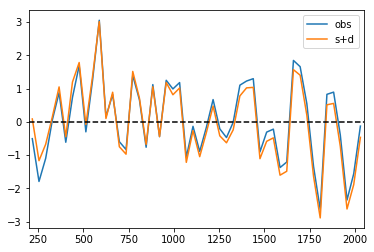

In [27]:
xlim(200,2048)
#EE = prjlib.binning1(tEE,mb)
tBB = curvedsky.utils.alm2cl(ps.lmax,sBlm+0.5*dBlm)/w2
BB = prjlib.binning1(tBB,mb)
plot(mb.bc,(oBB-mBB)/vBB,label='obs')
plot(mb.bc,(BB-mBB)/vBB,label='s+d')
axhline(0,color='k',ls='--')
legend(loc=0)